In [1]:
import os
import pandas as pd

## Read the train.csv file

In [2]:
train_df = pd.read_csv('./input/sartorius-cell-instance-segmentation/train.csv')
train_df.head()

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00


In [3]:
train_ids = train_df['id'].unique() # get unique ids from train_csv
len(train_ids)

606

## Explore informations in the csv file

In [4]:
train_df["cell_type"].unique()

array(['shsy5y', 'astro', 'cort'], dtype=object)

There are 3 type of cells

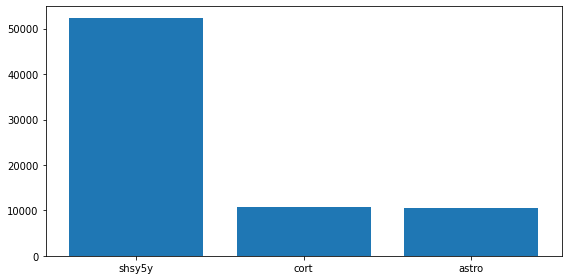

In [5]:
import matplotlib.pyplot as plt
cell_types = train_df["cell_type"].value_counts()

plt.figure(figsize=(8, 4), tight_layout=True)

plt.bar(cell_types.index, cell_types.values)
plt.show()

In [6]:
import numpy as np
# This helper function is from an outside source
def rle_decode(mask_rle, shape, color=1):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros((shape[0] * shape[1], shape[2]), dtype=np.float32)
    for lo, hi in zip(starts, ends):
        img[lo : hi] = color
    return img.reshape(shape)

In [7]:
# This helper function is from an outside source
def build_masks(labels, input_shape, colors=True):
    height, width = input_shape
    if colors:
        mask = np.zeros((height, width, 3))
        for label in labels:
            mask += rle_decode(label, shape=(height, width , 3), color=np.random.rand(3))
    else:
        mask = np.zeros((height, width, 1))
        for label in labels:
            mask += rle_decode(label, shape=(height, width, 1))
    mask = mask.clip(0, 1)
    return mask

### Visualization of different cell types

<ipython-input-8-54c63107c64d>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  sample_image = imageio.imread('./input/sartorius-cell-instance-segmentation/train/' + sample_id + '.png')


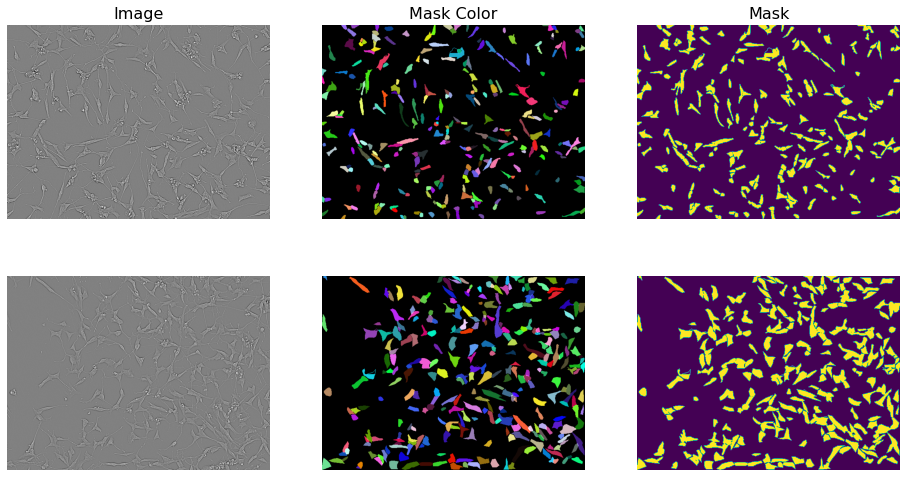

In [8]:
import imageio
shy5y_sample = train_df[train_df['cell_type'] == 'shsy5y'].sample(2)['id']

fig, axs = plt.subplots(2, 3, figsize=(16,20))
for idx, sample_id in enumerate(shy5y_sample):
        sample_image = imageio.imread('./input/sartorius-cell-instance-segmentation/train/' + sample_id + '.png')
        
        sample_rles = train_df.loc[train_df['id'] == sample_id]['annotation'].values
        
        sample_mask_colors = build_masks(sample_rles, (520, 704), colors=True)
        sample_mask = build_masks(sample_rles, (520, 704), colors=False)
        
        axs[idx][0].imshow(sample_image, cmap="binary")
        axs[idx][0].axis('off')        
        
        axs[idx][1].imshow(sample_mask_colors)        
        axs[idx][1].axis('off')        
        
        axs[idx][2].imshow(sample_mask)
        axs[idx][2].axis('off')        

axs[0][0].set_title("Image", fontsize=16)
axs[0][1].set_title("Mask Color", fontsize=16)
axs[0][2].set_title("Mask", fontsize=16)
   
fig.subplots_adjust(hspace=-0.7)
plt.show()  

<ipython-input-9-1dafc68569a3>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  sample_image = imageio.imread('./input/sartorius-cell-instance-segmentation/train/' + sample_id + '.png')


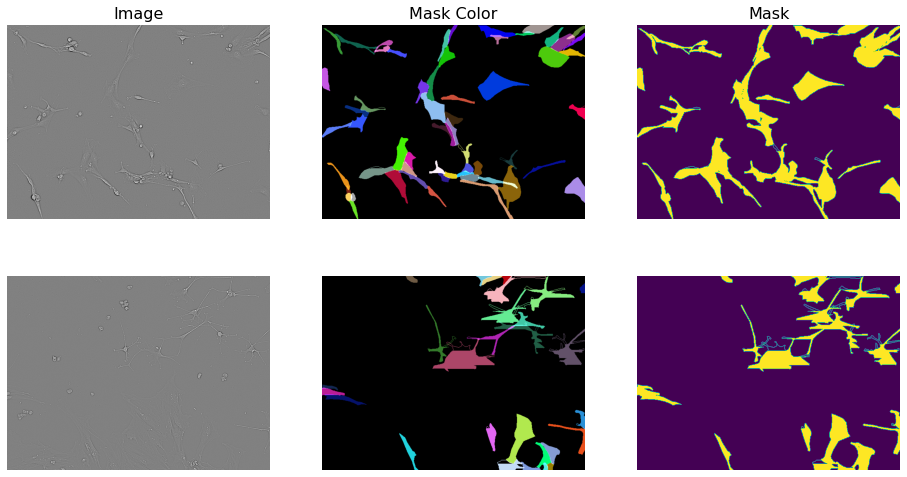

In [9]:
astro_sample = train_df[train_df['cell_type'] == 'astro'].sample(2)['id']

fig, axs = plt.subplots(2, 3, figsize=(16, 20))
for idx, sample_id in enumerate(astro_sample):
        sample_image = imageio.imread('./input/sartorius-cell-instance-segmentation/train/' + sample_id + '.png')
        
        sample_rles = train_df.loc[train_df['id'] == sample_id]['annotation'].values
        
        sample_mask_colors = build_masks(sample_rles, (520, 704), colors=True)
        sample_mask = build_masks(sample_rles, (520, 704), colors=False)
        
        axs[idx][0].imshow(sample_image, cmap="binary")
        axs[idx][0].axis('off')        
        
        axs[idx][1].imshow(sample_mask_colors)        
        axs[idx][1].axis('off')        
        
        axs[idx][2].imshow(sample_mask)
        axs[idx][2].axis('off')        

axs[0][0].set_title("Image", fontsize=16)
axs[0][1].set_title("Mask Color", fontsize=16)
axs[0][2].set_title("Mask", fontsize=16)
   
fig.subplots_adjust(hspace=-0.7)
plt.show() 

<ipython-input-10-b844008d780e>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  sample_image = imageio.imread('./input/sartorius-cell-instance-segmentation/train/' + sample_id + '.png')


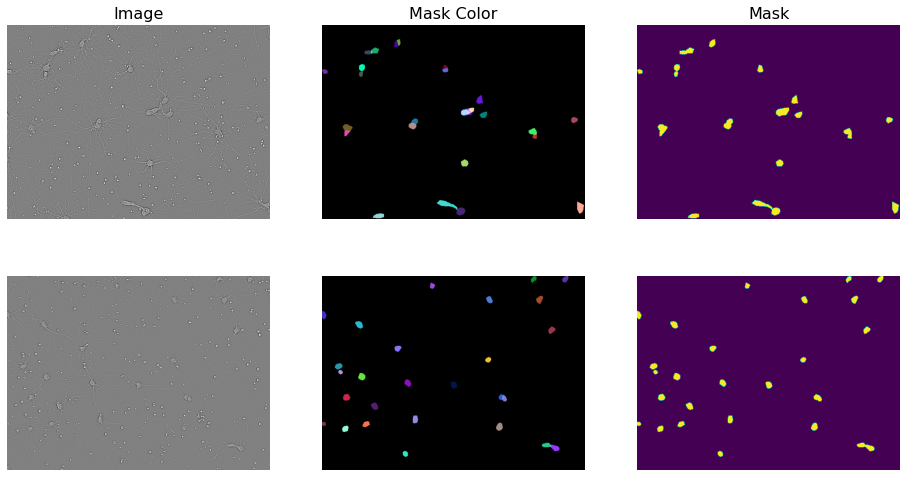

In [10]:
cort_sample = train_df[train_df['cell_type'] == 'cort'].sample(2)['id']

fig, axs = plt.subplots(2, 3, figsize=(16, 20))
for idx, sample_id in enumerate(cort_sample):
        sample_image = imageio.imread('./input/sartorius-cell-instance-segmentation/train/' + sample_id + '.png')
        
        sample_rles = train_df.loc[train_df['id'] == sample_id]['annotation'].values
        
        sample_mask_colors = build_masks(sample_rles, (520, 704), colors=True)
        sample_mask = build_masks(sample_rles, (520, 704), colors=False)
        
        axs[idx][0].imshow(sample_image, cmap="binary")
        axs[idx][0].axis('off')        
        
        axs[idx][1].imshow(sample_mask_colors)        
        axs[idx][1].axis('off')        
        
        axs[idx][2].imshow(sample_mask)
        axs[idx][2].axis('off')        

axs[0][0].set_title("Image", fontsize=16)
axs[0][1].set_title("Mask Color", fontsize=16)
axs[0][2].set_title("Mask", fontsize=16)
   
fig.subplots_adjust(hspace=-0.7)
plt.show() 

We can see the visualizations for cell types are very different from each other.

## Extract training datas

In [11]:
# See if all the images have the same size
same_size = True
temp = list(train_df['height'])[0]
for i in list(train_df['height']):
    if i != temp:
        same_size = False

temp = list(train_df['width'])[0]
for i in list(train_df['width']):
    if i != temp:
        same_size = False
same_size

True

In [12]:
# Assign width and height as constant since they are all the same
width = 704
height = 520

### Extract training images

In [13]:
imgs = []
for id_img in train_ids:
    img = imageio.imread('./input/sartorius-cell-instance-segmentation/train/' + id_img + '.png')
    img = np.array(img)
    imgs.append(img)
imgs = np.array(imgs)
imgs.shape

<ipython-input-13-d6f83d4d0073>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('./input/sartorius-cell-instance-segmentation/train/' + id_img + '.png')


(606, 520, 704)

### Extract training annotations from the .csv file

In [14]:
train_annotations = []
for id_img in train_ids:
    one_img = train_df[train_df['id'] == id_img]
    annotations = np.zeros(width * height) # create a array with the same size of the image but in 1 dim
    for i in one_img['annotation']:
        # split the annotations and group them into 2s.
        annotation_temp = i.split()
        annotation_lst = []
        for j in range(0, len(annotation_temp), 2): 
            annotation_lst.append([annotation_temp[j], annotation_temp[j+1]])
         
        for j in annotation_lst:
            location = j
            location = np.arange(int(location[0]) - 1, int(location[0]) - 1 + int(location[1]))
            location = location.astype(np.uint)
            annotations[location] = 1
        
    annotations = annotations.reshape(height, width)
    
    train_annotations.append(annotations)
train_annotations = np.array(train_annotations)
train_annotations.shape

(606, 520, 704)

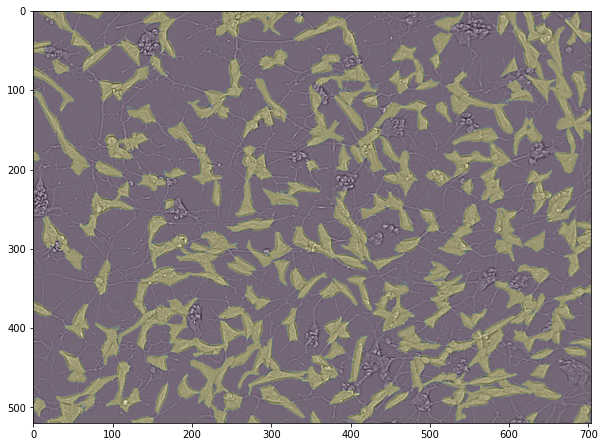

In [15]:
plt.figure(figsize=(10, 10))
plt.imshow(imgs[0], cmap="binary")
plt.imshow(train_annotations[0], alpha=0.2)

## Split the images into smaller images using an outside source

In [16]:
# This helper function is from an outside source
def split_img(img: np.ndarray, 
              size: int = 128, 
              excess: bool = True) -> np.ndarray:
    """get image and split it on size
    
    params:
        img:  original image
        size: size of results"""
    
    h_offsets = height // size
    w_offsets = width // size
    
    if excess:
        h_excess = height % size
        w_excess = width % size
    
        h_offsets += 1 if h_excess else 0
        w_offsets += 1 if h_excess else 0
    
    arr_imgs = []
    for i in range(h_offsets):
        for j in range(w_offsets):
            
            w_start, w_end = j*size, (j+1)*size
            
            if j == w_offsets-1 and excess:
                w_start += w_excess - size
                w_end += w_excess - size
            
            h_start, h_end = i*size, (i+1)*size
            
            if i == h_offsets-1 and excess:
                h_start += h_excess - size
                h_end += h_excess - size
            
            piese = img[h_start: h_end,
                        w_start: w_end]
        
            arr_imgs.append(piese)
    
    arr_imgs = np.array(arr_imgs)[..., None]
    
    return arr_imgs

# This helper function is from an outside source
def view_splitimg_imgs(pieces: np.ndarray, 
                       masks: np.ndarray = np.array([]), 
                       excess: bool = True) -> None:
    """Show original image from its parts in the form of a grid
    
    params:
        pieces: array of images that are part of a original image
        masks:  array of masks that are part of a original mask
        excess: allocate space for excesses"""
    
    size = pieces.shape[1] # 128
    
    cols = width // size
    rows = height // size
    
    if excess:
        w_excess = width % size
        h_excess = height % size
    
        cols += 1 if w_excess else 0
        rows += 1 if h_excess else 0

    fig, ax = plt.subplots(rows, cols, figsize=(12, 10))

    for i in range(rows):
        for j in range(cols):

            idx = j + i*cols

            ax[i, j].imshow(pieces[idx], cmap="binary")
            if len(masks) > 0:
                ax[i, j].imshow(masks[idx], alpha=0.2)
            ax[i, j].axis("off")

    plt.subplots_adjust(wspace=0.01, hspace=0.01)

(12120, 128, 128, 1) (12120, 128, 128, 1)
Wall time: 6.68 s


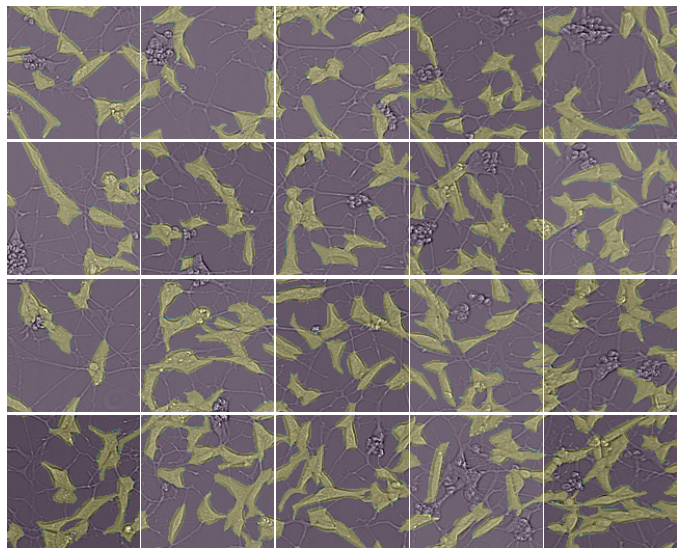

In [17]:
%%time
# This code is from an outside source
train_imgs = np.concatenate([split_img(imgs[i], excess=False) for i in range(len(imgs))], axis=0)
train_masks = np.concatenate([split_img(train_annotations[i], excess=False) for i in range(len(train_annotations))], axis=0)

print(train_imgs.shape, train_masks.shape)

view_splitimg_imgs(train_imgs, train_masks, excess=False)

## Building dataset for the model

In [18]:
import tensorflow as tf
train_imgs = train_imgs[4040:]
valid_imgs = train_imgs[:4040]
train_masks = train_masks[4040:]
valid_masks = train_masks[:4040]
train_ds = tf.data.Dataset.from_tensor_slices((train_imgs, train_masks))
valid_ds = tf.data.Dataset.from_tensor_slices((valid_imgs, valid_masks))

In [19]:
BATCH_SIZE = 1

# This helper function is from an outside source
def prep_data(img: np.ndarray, 
              mask: np.ndarray) -> tuple:
    """normalize pixel array -> retype pixel array
    
    params:
        img:  image array
        mask: mask array"""
    
    img /= 255
    
    img = tf.cast(img, tf.float32)
    mask = tf.cast(mask, tf.float32)
    
    return img, mask

# This helper function is from an outside source
def pipline(ds):
    """cache -> suffle -> preprocess -> split on batchs -> prefetch
    
    params:
        ds: dataset to pipline"""
    
    ds = ds.cache()
    ds = ds.shuffle(1000)
    ds = ds.map(prep_data)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    
    return ds

train_ds = pipline(train_ds)
valid_ds = valid_ds.map(prep_data).batch(BATCH_SIZE)


# The U-net model

In [20]:
# This model is from an outside source
from tensorflow.keras import layers
class UNet(tf.keras.Model):
    
    def __init__(self):
        super().__init__()
        
        # encoder
        self.conv_enc64_1 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv_enc64_2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')
    
        
        self.maxpool = layers.MaxPooling2D((2, 2), (2, 2), padding='same')
        
        self.dropout = layers.Dropout(0.2)
        self.BatchNormalization = layers.BatchNormalization()
        
        # decoder
        self.conv_dec1024_1 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv_dec1024_2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv_transp_512 = layers.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same', activation='relu')
        

        
        self.conv_dec64_1 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv_dec64_2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        
        self.conv_final = layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')
        
    def call(self, x):
        
        # encoder
        out = self.conv_enc64_1(x)
        out1 = self.conv_enc64_2(out)
        out = self.maxpool(out1)
        
        out = self.dropout(out)
        out = self.BatchNormalization(out)
        

        # decoder
        out = self.conv_dec1024_1(out)
        out = self.conv_dec1024_2(out)
        out = self.conv_transp_512(out)
        out = tf.concat([out1, out], axis=3)   #out 4 in original version
        
        
        out = self.conv_dec64_1(out)
        out = self.conv_dec64_2(out)
        
        out = self.conv_final(out)
        
        return out

In [21]:
# This code is from an outside source
model = UNet()

optimizer = tf.keras.optimizers.Adam()
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

loss_obj = tf.keras.losses.BinaryCrossentropy()
loss = tf.keras.metrics.Mean()

In [22]:
# This code is from an outside source
checkpoint_path = "./checkpoints/trainUnet123123"

ckpt = tf.train.Checkpoint(
    model=model,
    optimizer=optimizer
)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=1)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!')

In [23]:
# This helper function is from an outside source
def plot_process(train_values, valid_values, figsize=(16, 4)):
    """plot loss or accuracy
    
    params:
        train_values: array for train
        valid_values: array for valid
        figsize:      size of plots"""
    
    plt.figure(figsize=figsize)
    plt.plot(train_values, label='train')
    plt.plot(valid_values, label='valid')
    plt.legend()
    plt.show()
    
# This helper function is from an outside source
def view_masks(img, mask, pred_mask, figsize=(14, 8)):
    """view result of training
    
    params:
        img:       array of original image
        mask:      array of original mask
        pred_mask: array of predicted mask
        figsize:   size of image"""
    
    fig, ax = plt.subplots(1, 2, figsize=figsize)

    ax[0].set_title('true')
    ax[0].imshow(img, cmap="binary")
    ax[0].imshow(mask, alpha=0.2)

    ax[1].set_title('pred')
    ax[1].imshow(img, cmap="binary")
    ax[1].imshow(pred_mask, alpha=0.2)
    
    plt.show()

In [24]:
EPOCHS = 3

train_loss, train_accuracy = [], []
valid_loss, valid_accuracy = [], []

valid_batch_img, valid_batch_mask = next(valid_ds.as_numpy_iterator())

0
0	train loss: 0.6909 | train accuracy: 0.9172 | valid loss: 0.6616 | valid accuracy: 0.8758


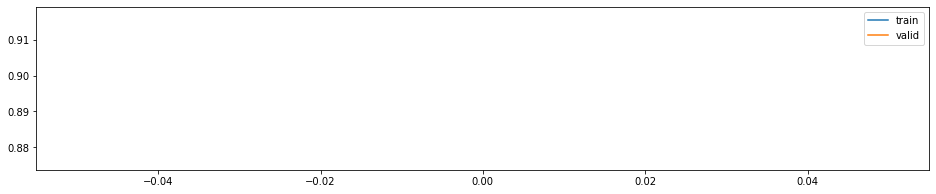

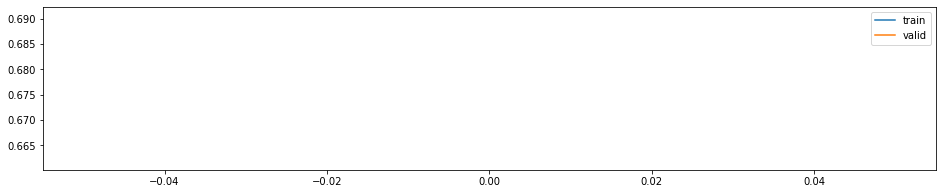

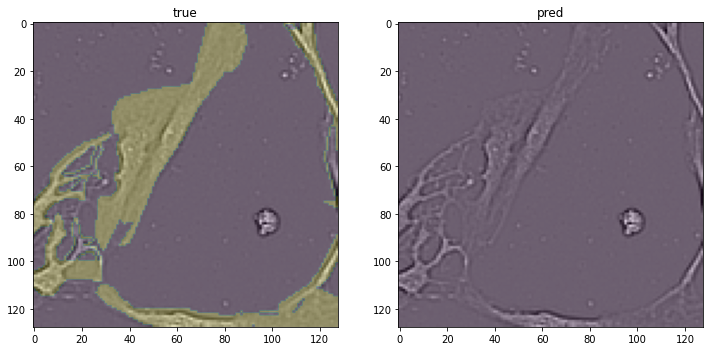

checkpoint was saved


KeyboardInterrupt: 

In [25]:
%%time
# This code is from an outside source

for epoch in range(EPOCHS):
    print(epoch)
    
    for i, (train_batch_img, train_batch_mask) in enumerate(train_ds):

        with tf.GradientTape() as tape:
            train_batch_mask_pred = model(train_batch_img)
            train_loss_value = loss_obj(train_batch_mask, train_batch_mask_pred)

        gradients = tape.gradient(train_loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        loss(train_loss_value)
        accuracy(train_batch_mask, train_batch_mask_pred)
        
        if i % 200 == 0:
            valid_batch_mask_pred = model(valid_batch_img)

            valid_loss_value = loss_obj(valid_batch_mask, valid_batch_mask_pred)

            valid_accuracy_value = accuracy(valid_batch_mask, valid_batch_mask_pred)
            train_accuracy_value = accuracy(train_batch_mask, train_batch_mask_pred)

            print(f'{i}\ttrain loss: {train_loss_value:.4f} | train accuracy: {train_accuracy_value:.4f} |',
                  f'valid loss: {valid_loss_value:.4f} | valid accuracy: {valid_accuracy_value:.4f}')

            train_loss.append(train_loss_value)
            valid_loss.append(valid_loss_value)

            train_accuracy.append(train_accuracy_value)
            valid_accuracy.append(valid_accuracy_value)
            
        if i % 4000 == 0:
            
            plot_process(train_accuracy, valid_accuracy, figsize=(16, 3))
            plot_process(train_loss, valid_loss, figsize=(16, 3))
            
            view_masks(
                img=valid_batch_img[0, ..., 0],
                mask=valid_batch_mask[0, ...],
                pred_mask=(valid_batch_mask_pred[0, ... ,0] > 0.5).numpy().astype(np.float32), 
                figsize=(12, 8)
            )
            
            
            ckpt_manager.save()
            print("checkpoint was saved")

## Make Prediction

In [26]:
test_imgs = []
for i in os.listdir('./input/sartorius-cell-instance-segmentation/test/'):
    test_img = imageio.imread('./input/sartorius-cell-instance-segmentation/test/' + i)
    test_img = np.array(test_img)
    test_imgs.append(test_img)
test_imgs = np.array(test_imgs)
test_imgs.shape

<ipython-input-26-f409c76fb160>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  test_img = imageio.imread('./input/sartorius-cell-instance-segmentation/test/' + i)


(3, 520, 704)

In [27]:
predictions = []
for i in test_imgs:
    prediction = model(i.reshape(1, 520, 704, 1) / 255)
    #print(np.where(prediction > 0.5))
    prediction = np.where(prediction >= 0.5, prediction, 0)
    prediction = np.where(prediction < 0.5, prediction, 1)
    prediction = prediction.reshape(520, 704)
    predictions.append(prediction)

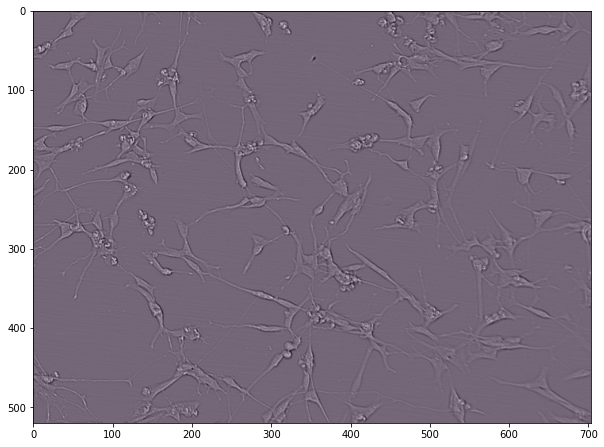

In [28]:
plt.figure(figsize=(10, 10))
plt.imshow(test_imgs[0], cmap="binary")
plt.imshow(predictions[0], alpha=0.2)